Creatve Common  (c) 2019 [Dez](desireyavro.com)

https://github.com/dnzengou/products-correlation

# Products correlation - Code Examples

We will look at one score for variables that have a Gaussian distribution and a linear relationship.
More specifically, we want here to illustrate the concept of negative correlation (r < 1)

In [2]:
#!pip install watermark
%load_ext watermark
%watermark -a 'Dez' -u -d -p numpy,pandas,matplotlib

Dez 
last updated: 2019-12-08 

numpy 1.15.4
pandas 0.23.4
matplotlib 3.0.2


### Overview


- [Test dataset](#Test-Dataset)
    - [Plot](#Plot)
- [Covariance](#Covariance)
    - [Pearson correlation](#Pearson-Coefficient)
- [Summary](#Summary)

<br>
<br>

In [3]:
# Import necessary packages to generate needed random variables for the simulation
from numpy import mean
from numpy import std
from numpy.random import randn
from numpy.random import seed
from matplotlib import pyplot

In [4]:
# seed random number generator.
# seed() method in Python's random module initializes the pseudorandom number generator.
seed(1)

In [16]:
# prepare data, here representing products data points. Arbitrarliy
A = 10 + 6*randn(1000)
B = 3 * randn(1000) + 5 - A

In [20]:
#Summary results
# Print the mean and standard deviation for each variable (assuming they are represented by products A and B)
print('A: mean = %.3f stdv = %.3f' % (mean(A), std(A)))
print('B: mean = %.3f stdv = %.3f' % (mean(B), std(B)))

A: mean = 10.186 stdv = 6.197
B: mean = -5.138 stdv = 6.674


## Plot

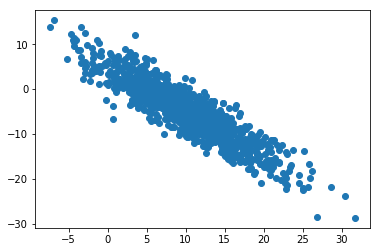

In [18]:
pyplot.scatter(A,B)
pyplot.show()

Looking at the scatter plot of the two variables created, it is easy to observe there is a relationship between the two variables because of the decreasing trend. This is expected as we have contrived the dataset (with a negative slop betweem data points from A and B).

## Covariance

In [26]:
# calculate the covariance between two variables
from numpy import cov

# Running the example below calculates and prints the covariance matrix
## cov(X, Y) = (sum (x - mean(X)) * (Y - mean(Y)) ) * 1/(N-1)
covariance = cov(A, B)
print(covariance)

[[ 38.44178137 -37.49351744]
 [-37.49351744  44.58900622]]


Because we've initially made it such that the dataset was contrived with each variable drawn from a Gaussian distribution AND the variables linearly correlated, covariance can in this case be a reasonable method for describing the relationship. However covariance as a statistical tool is difficult to interpret.
We then introduce Pearson’s correlation coefficient.

## Pearson Coefficient

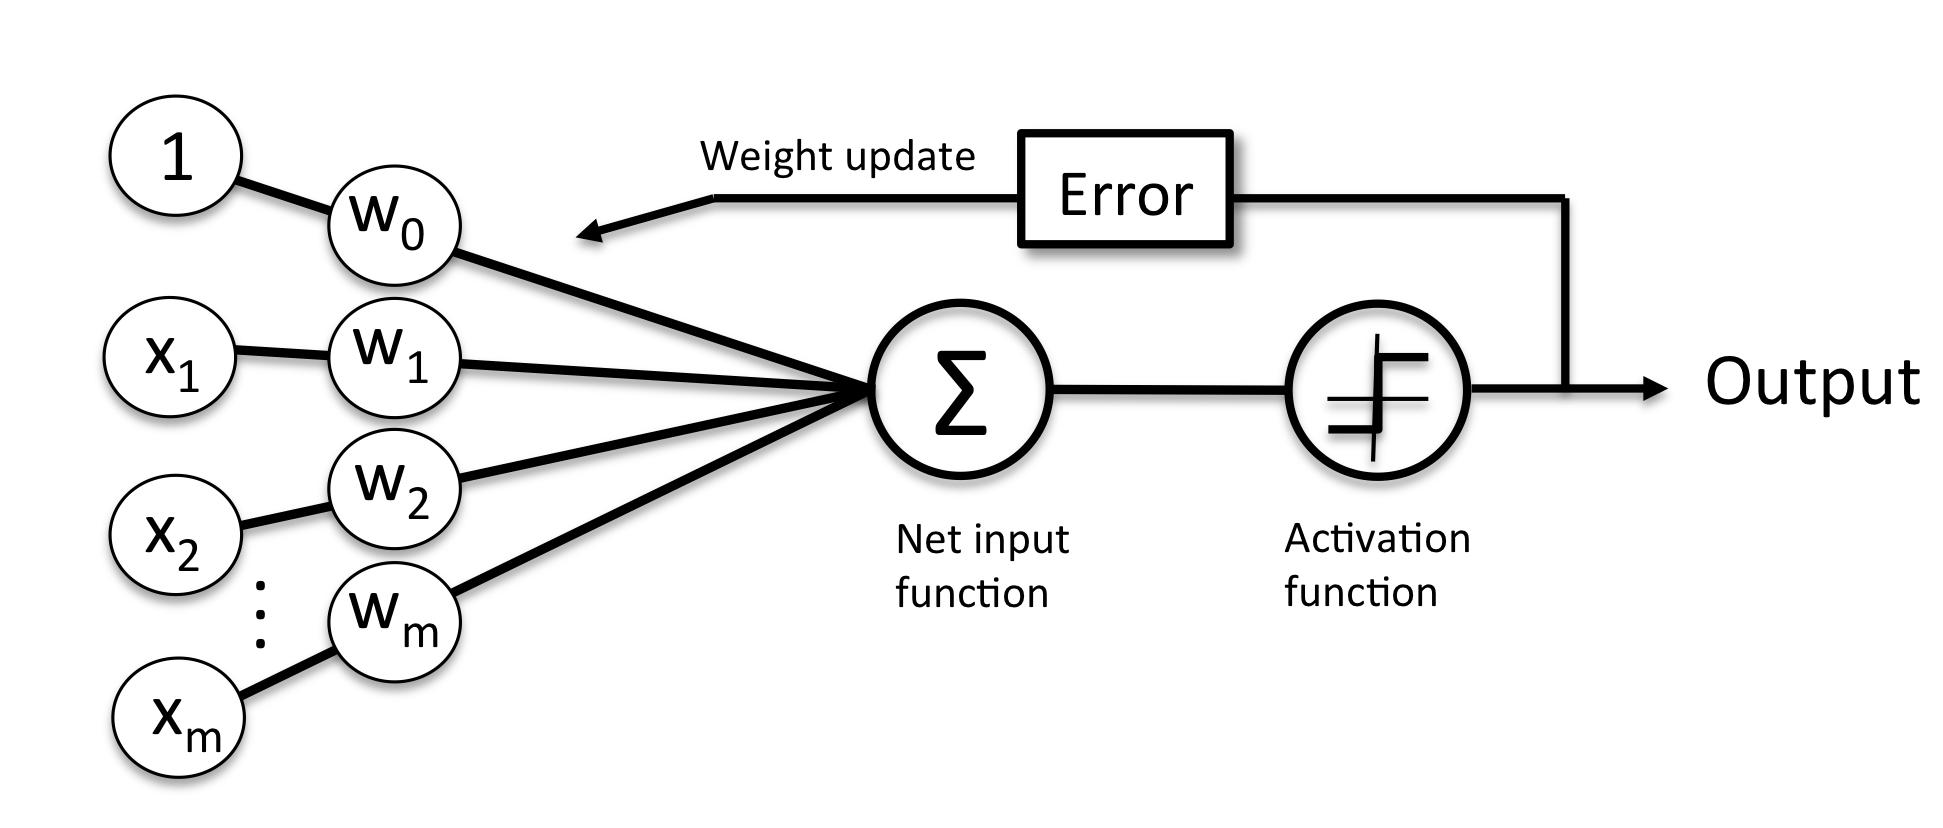

In [6]:
 Image(filename='./images/02_04.png', width=600) 

<br>
<br>

# Implementing a perceptron learning algorithm in Python

In [1]:
import numpy as np


class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.

    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.

        Returns
        -------
        self : object

        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [3]:
### Additional Note (1)

Please note that the learning rate η (eta) only has an effect on the classification outcome  if the weights are initialized to non-zero values. If all the weights are initialized to 0, the learning rate parameter eta affects only the scale of the weight vector but not its direction. To have the learning rate influence the classification outcome, the weights need to be initialized to non-zero values. The respective lines in the code that need to be changed to accomplish that are highlighted on below:

```python
   def __init__(self, eta=0.01, n_iter=50, random_seed=1): # add random_seed=1
        ...
        self.random_seed = random_seed # add this line

    def fit(self, X, y):
        ...
        # self.w_ = np.zeros(1 + X.shape[1]) ## remove this line
        rgen = np.random.RandomState(self.random_seed) # add this line
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1]) # add this line
```

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 10)

In [5]:
### Additional Note (2)

I received a note by a reader who asked about the net input function:

>On page 27, you describe the code.

> the net_input method simply calculates the vector product wTx
However, there is more than a simple vector product in the code:

> def net_input(self, X):  
    """Calculate net input"""  
    return np.dot(X, self.w_[1:]) + self.w_[0]  
   
> In addition to the dot product, there is an addition. The text does not mention anything about what is this + self.w_[0]
> Can you (or anyone) explain why that's there?

-------

Sorry that I went over that so briefly. The `self.w_[0]` is basically the "threshold" or so-called "bias unit." I simply included the bias unit in the weight vector, which makes the math part easier, but on the other hand, it may make the code more confusing as you mentioned.



Let's say we have a 3x2 dimensional dataset `X` (3 training samples with 2 features). Also, let's just assume we have a weight `2` for feature 1 and a weight `3` for feature 2, and we set the bias unit to `4`. 

```
import numpy as np
>>> bias = 4.
>>> X = np.array([[2., 3.], 
...              [4., 5.], 
...              [6., 7.]])
>>> w = np.array([bias, 2., 3.])
```

In order to match the mathematical notation, we would have to add a vector of 1s to compute the dot-product:

```
>>> ones = np.ones((X.shape[0], 1))
>>> X_with1 = np.hstack((ones, X))
>>> X_with1
>>> np.dot(X_with1, w)
array([ 17.,  27.,  37.])
```

However, I thought that adding a vector of 1s to the training array each time we want to make a prediction would be fairly inefficient. So, instead, we can just "add" the bias unit (`w[0]`) to the do product (it's equivalent, since `1.0 * w_0 = w_0`:

```
>>> np.dot(X, w[1:]) + w[0] 
array([ 17.,  27.,  37.])
```

Maybe it is helpful to walk through the matrix-vector multiplication by hand. E.g.,

```
| 1  2  3 |   | 4 |   | 1*4 + 2*2 + 3*3 |   | 17 |
| 1  4  5 | x | 2 | = | 1*4 + 4*2 + 5*3 | = | 27 |
| 1  6  7 |   | 3 |   | 1*4 + 6*2 + 7*3 |   | 37 |
```

which is the same as

```
| 2  3 |                  | 2*2 + 3*3 |          | 13 + bias |   | 17 |
| 4  5 | x | 2 | + bias = | 4*2 + 5*3 | + bias = | 23 + bias | = | 27 |
| 6  7 |   | 3 |          | 6*2 + 7*3 |          | 33 + bias |   | 37 |

```

SyntaxError: invalid syntax (<ipython-input-5-431e65e0a7bd>, line 3)